## Coletor de Keywords de Links Pertinentes

In [1]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

train = 'news_list_negative.txt'
saved_kw = 'kw_learn_negative_results.txt'
kw_list_train = 'kw_list_negative.txt'
tgt = '0' # 0 ou 1, sendo 0 para noticia negativa e 1 para noticia positiva (uso violento ou não de ADF)

In [2]:
# BACKUP DAS KW - Cria uma variável com as leituras do arquivo, para caso este seja sobrescrito.
#fileHandle= open(saved_kw, 'r')
#mem = fileHandle.readlines()
#fileHandle.close()

In [3]:
kw_list = [] # cria uma lista em branco
news_dates = [] # lista de data de publicação
news_titles = [] # lista de titulos
news_summary = [] # lista de resumos
news_authors = [] # lista de autores
news_target = [] # lista de targets

fileHandle = open(train,'r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [4]:
def get_kw(url):
    article = Article(url, fetch_images=False, language='pt', request_timeout=200) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    print(article.title)
    print(article.publish_date)
    print(article.keywords)
    print('\n')

    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    news_dates.append(article.publish_date)
    news_titles.append(article.title)
    news_summary.append(article.summary)
    #news_author.append(article.authors)
    news_target.append(tgt)
    time.sleep(5)
    
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[a,b,c],[d,e,f],[a,e,f]] --> [a,a,b,c,d,e,e,f,f]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            #print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de 
                                                            #frequência de aparecimento nas noticias

In [5]:
print("Getting info from {} articles".format(len(url_news)))
for url in url_news: # para cada url no arquivo lido
    print("URL {}".format(url_news.index(url)))
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    try:
        get_kw(url) # chama a função para extrair kw de cada url
        print("done with: ",url)
        print("\n")
    except:
        print("Uh oh! We got an error. NEXT!")
print("done!")

Getting info from 58 articles
URL 0
Mulheres dispensam mensagens de parabéns e pedem fim da violência
None
['brasil', 'flores', 'pedem', 'luta', 'mulher', 'twitter', 'mensagens', 'mulheres', 'data', 'parabéns', 'gênero', 'dispensam', 'feminicídio', 'violência']


done with:  https://www.brasil247.com/pt/247/brasil/386215/Mulheres-dispensam-mensagens-de-parab%C3%A9ns-e-pedem-fim-da-viol%C3%AAncia.htm


URL 1
Venezuela: depois de apagão, Maduro e Guaidó convocam novos protestos no país
2019-03-09 00:00:00
['país', 'el', 'usurpador', 'venezuelano', 'sextafeira', 'maduro', 'venezuela', 'convocam', 'energia', 'la', 'quintafeira', 'pediu', 'guaidó', 'apagão', 'protestos']


done with:  https://g1.globo.com/mundo/noticia/2019/03/09/venezuela-depois-de-apagao-maduro-e-guaido-convocam-novos-protestos-no-pais.ghtml


URL 2
Redes sociais norteiam atuação de parlamentares no Congresso
2019-03-09 00:00:00
['rodrigo', 'maia', 'sociais', 'reforma', 'norteiam', 'parlamentar', 'congresso', 'vivo', 'atu

done with:  https://extra.globo.com/casos-de-policia/policia-prende-principal-suspeito-de-matar-adolescente-em-nova-iguacu-23508641.html


URL 21
'Foi pelo meu posicionamento político', diz dirigente do PT que teve braço quebrado por PMs em delegacia
2019-03-08 00:00:00
['atibaia', 'braço', 'disse', 'policial', 'pms', 'policiais', 'justiça', 'algemas', 'político', 'ocorrência', 'quebrado', 'prisão', 'delegacia', 'posicionamento', 'doratioto', 'dirigente', 'pt']


done with:  https://g1.globo.com/sp/sao-paulo/carnaval/2019/noticia/2019/03/08/foi-pelo-meu-posicionamento-politico-diz-dirigente-do-pt-que-teve-braco-quebrado-por-pms-em-delegacia.ghtml


URL 22
Mourão produz “incêndio amigo” a todo segundo, diz Feliciano a Bolsonaro
2019-03-08 19:54:20+00:00
['bolsonaro', 'mourão', 'vídeo', 'feliciano', 'vicepresidente', 'vice', 'federal', 'produz', 'presidente', 'amigo', 'incêndio', 'deputado']


done with:  https://www.gospelprime.com.br/mourao-produz-incendio-amigo-a-todo-segundo-diz-feli

done with:  https://g1.globo.com/mg/zona-da-mata/noticia/2019/02/25/jovens-fazem-disparo-de-janela-de-onibus-e-sao-detidos-pela-pm-em-juiz-de-fora.ghtml


URL 41
Sorriso: Menor tenta tirar arma de policial e guarnição é obrigada efetuar disparo
None
['tentando', 'serem', 'rondas', 'revoltado', 'policial', 'guarnição', 'arma', 'tenta', 'tirar', 'reprodução', 'relato', 'disparo', 'êxito', 'sorriso', 'efetuar', 'tática']


done with:  http://mtnoticias.net/sorriso-menor-tenta-tirar-arma-de-policial-e-guarnicao-e-obrigada-efetuar-disparo/


URL 42
Operação da PCDF prende 103 foragidos em 5 dias: 'Sem disparo ou violência'
2019-02-22 00:00:00
['polícia', 'números', 'operação', 'prende', '103', 'segundafeira', '5', 'mandados', 'dias', 'justiça', 'repressão', 'ações', 'disparo', 'foragidos', 'cumpridos', 'qualificada', 'violência', 'pcdf']


done with:  https://www.correiobraziliense.com.br/app/noticia/cidades/2019/02/22/interna_cidadesdf,739204/operacao-da-pcdf-prende-103-foragidos-em-5-dias

In [6]:
print(len(kw_list))
print(len(news_dates))
print(len(news_titles))
print(len(news_summary))
print(len(news_authors))
print(len(news_target))

58
58
58
58
0
58


In [7]:
kw_learn = kw_clear();

In [8]:
## Salva as KW para análise posterior
with open(saved_kw, 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

In [9]:
f = open(kw_list_train,'a')
for item in kw_list:
    f.write("%s\n" % item)
f.close()

In [10]:
# importe bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

In [11]:
data = {'DATA': news_dates, 'TITULO': news_titles,'KW': kw_list,
        'RESUMO': news_summary, 
        'URL': url_news, 'TARGET': news_target} # as informações serão divididas em duas colunas,
                                            #cujos valores são as listas formatadas previamente.
news_df = pd.DataFrame(data, columns=['DATA','TITULO','KW','RESUMO','URL','TARGET'])

In [12]:
news_df.sample(10)

,DATA,TITULO,KW,RESUMO,URL,TARGET
25,None,Homem é preso por estuprar a própria sogra de ...,"[bezerra, idosa, preso, polícia, filha, confes...","José Bezerra da Silva, 44 anos, foi preso em f...",https://claudia.abril.com.br/noticias/homem-e-...,0
52,2019-02-28 00:00:00,Trio é preso tentando arremessar granada casei...,"[tentando, armas, preso, presídio, granada, fu...",Dois homens e uma mulher foram presos em flagr...,https://g1.globo.com/pe/pernambuco/noticia/201...,0
54,2019-02-22 00:00:00,Henrique Fogaça posta foto com arma e provoca ...,"[fogaça, henrique, imagem, arma, polêmica, fot...",Fogaça e a esposa postaram a foto no Instagram...,https://www.uai.com.br/app/noticia/mexerico/20...,0
45,2019-02-28 00:00:00,Prefeito suspeito de fraude eleitoral é preso ...,"[oliveira, preso, prefeito, jogar, suspeito, f...",Prefeito suspeito de fraude eleitoral é preso ...,https://g1.globo.com/to/tocantins/noticia/2019...,0
46,2019-02-26 00:00:00,Jovem é preso por porte de arma em Resende,"[residência, pistola, preso, polícia, porte, s...","De acordo com a Polícia Militar (PM), os agent...",https://g1.globo.com/rj/sul-do-rio-costa-verde...,0
39,None,Bahia Notícias / Notícia / Justiça vai investi...,"[notícia, questões, laranjas, renildo, falar, ...",O Rei Momo do Carnaval de Salvador de 2019 des...,https://www.bahianoticias.com.br/noticia/23291...,0
19,2019-03-08 20:45:53,'Saúde absolutamente normal': promotores inter...,"[diferenciado, desmentem, atendimento, médium,...","Na sala de interrogatórios, o médium reclamava...",https://extra.globo.com/noticias/brasil/saude-...,0
53,2019-02-27 00:00:00,Homem é preso pelo 8º BPM por porte ilegal de ...,"[touma, preso, tocantinstoo, prisão, militares...","Na madrugada desta segunda-feira (25), policia...",http://surgiu.com.br/2019/02/27/homem-e-preso-...,0
49,None,Pedidos de posse de arma em Joinville crescem ...,"[crescem, polícia, públicos, período, arma, 25...",*Por Hassan FariasO número de solicitações de ...,https://www.nsctotal.com.br/colunistas/saavedr...,0
56,None,Motociclista dispensa arma de fogo em persegui...,"[cidade, motocicleta, ocupantes, policial, ord...",Motociclista dispensa arma de fogo em persegui...,http://www.barbacenamais.com.br/policia-mais/6...,0


In [13]:
news_df.to_csv('GVArchive_N.csv')

## Após os dados coletados
Análise das Keywords

In [14]:
## Abre as KW
fileHandle = open(saved_kw, 'r')
kw_list = fileHandle.readlines()
fileHandle.close()

kw_list = [word.strip() for word in kw_list] # remove o \n das palavras

In [15]:
import collections
a = kw_list
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('arma', 18), ('polícia', 15), ('preso', 12), ('fogo', 10), ('mulher', 9), ('bolsonaro', 9), ('mulheres', 8), ('armas', 8), ('policial', 7), ('pm', 7), ('disparo', 7), ('violência', 6), ('disse', 6), ('prisão', 6), ('suspeito', 6), ('homem', 6), ('brasil', 5), ('policiais', 5), ('flores', 4), ('presidente', 4), ('federal', 4), ('vítima', 4), ('justiça', 4), ('tráfico', 4), ('delegacia', 4), ('munições', 4), ('mensagens', 3), ('país', 3), ('r', 3), ('juiz', 3), ('governo', 3), ('ministro', 3), ('homens', 3), ('internacional', 3), ('rio', 3), ('militar', 3), ('segurança', 3), ('posse', 3), ('pistola', 3), ('calibre', 3), ('porte', 3), ('drogas', 3), ('jovem', 3), ('luta', 2), ('twitter', 2), ('data', 2), ('gênero', 2), ('feminicídio', 2), ('rodrigo', 2), ('sociais', 2)]


In [16]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Visualização dos dados

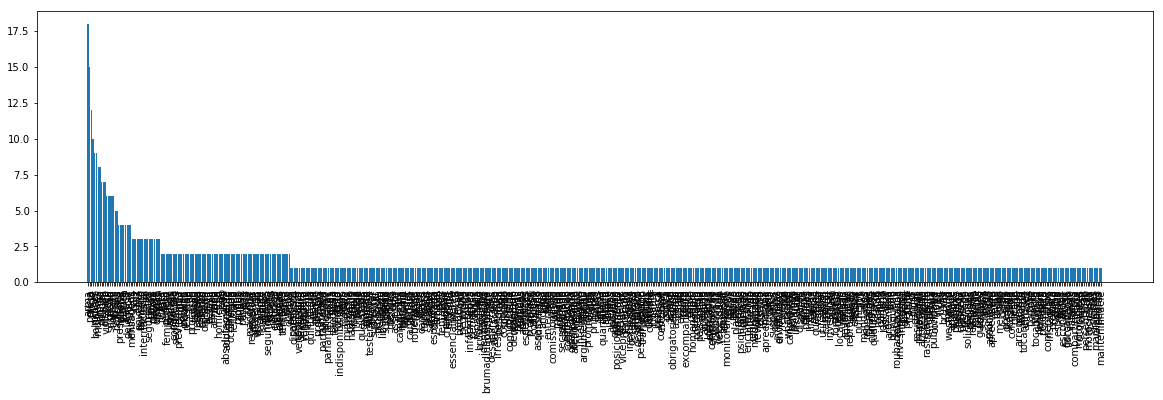

In [17]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [18]:
## Separa o dict gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

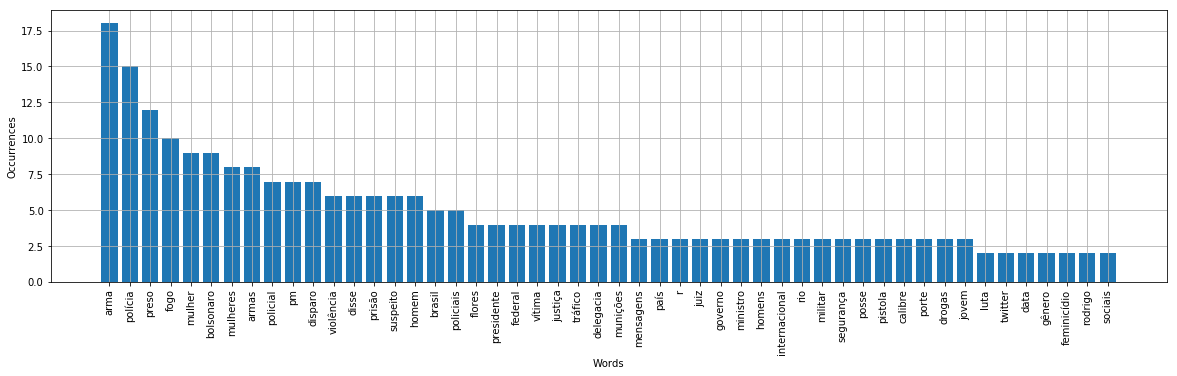

In [19]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()